In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import plotly.express as px 

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    confusion_matrix, 
    precision_recall_curve,
    roc_auc_score, 
    roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:
os.getcwd()

'/Users/rayyanshanawazmemon'

In [3]:
os.chdir('/Users/rayyanshanawazmemon/Downloads')

In [4]:
df = pd.read_csv('Breast Cancer Data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
df.diagnosis.replace({"M" : 1 , "B" : 0}).value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [10]:
df = df.replace({"M" :1 , "B" : 0})

In [11]:
df = df.drop(['id'],axis=1)

In [12]:
df.describe().T

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

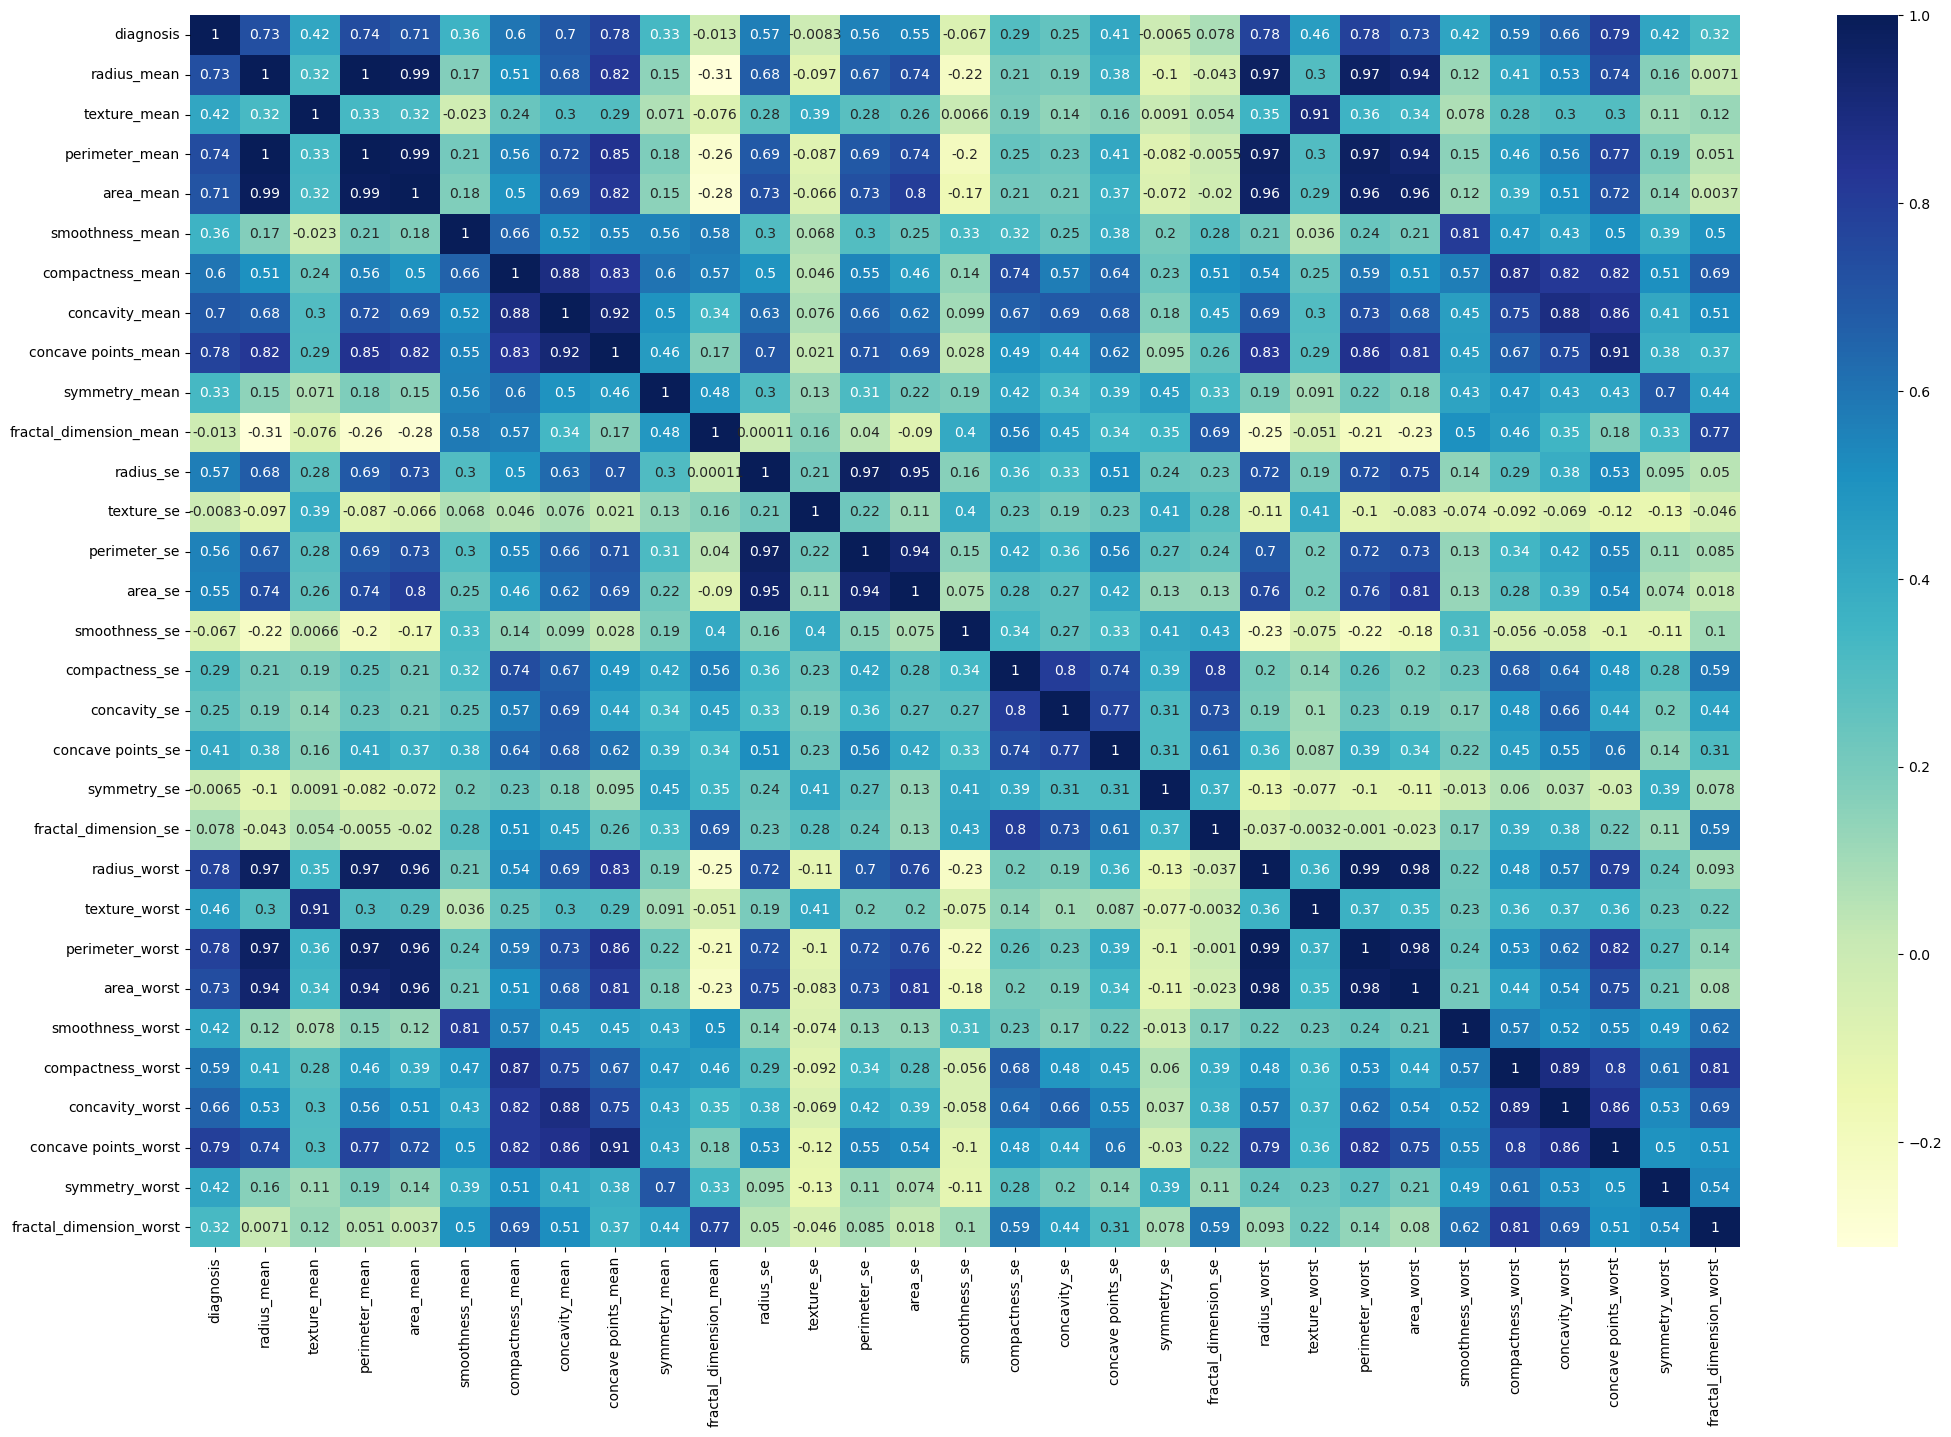

In [13]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [14]:
for i in df.select_dtypes(include="number").columns:
    fig = px.box(df,x=i)
    fig.show()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [17]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [18]:
x = df.iloc[:,1:]
y = df['diagnosis']


In [19]:
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [20]:
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pc = pca.fit_transform(x)

In [23]:
x_pca=pd.DataFrame(pc)

In [24]:
for i in pca.explained_variance_ratio_*100:
    print(i)

98.20446715106615
1.617648986351107
0.15575107450152403
0.012093196354011689
0.008827245358462172
0.0006648839512394116
0.0004017136820084889
8.220171966557928e-05
3.441352786163575e-05
1.8601872147776016e-05
6.994732053514221e-06
1.6590887963838696e-06
6.996416497608447e-07
4.783183055948635e-07
2.935492139063714e-07
1.416849266261899e-07
8.295777313432721e-08
5.204058825132534e-08
4.084639829188439e-08
3.633133778139805e-08
1.7284973748247667e-08
1.274875082764139e-08
7.726829729279931e-09
6.283577183865377e-09
3.5730229480733407e-09
2.763960409071811e-09
8.1445225896877e-10
6.302115412296586e-10
4.4366694452045333e-10
1.553446804648836e-10


In [25]:
y = y.replace({"M" : 1 , "B" : 0})

In [26]:
x_pca_top_2 = x_pca.iloc[:,:2]

In [27]:
# train test split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_top_2,y,test_size = 0.25,random_state=9)

In [29]:
y_test

91     1
40     1
70     1
106    0
97     0
      ..
387    0
23     1
525    0
533    1
57     1
Name: diagnosis, Length: 143, dtype: int64

In [30]:
y_test

91     1
40     1
70     1
106    0
97     0
      ..
387    0
23     1
525    0
533    1
57     1
Name: diagnosis, Length: 143, dtype: int64

In [31]:
# fitting a model

In [32]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
# logistic model evalution

In [34]:
y_pred = model.predict(x_train)

In [35]:
f1_score(y_train,y_pred)

0.8925081433224755

In [36]:
y_pred_test = model.predict(x_test)

In [37]:
f1_score(y_test,y_pred_test)

0.9199999999999999

In [38]:
f1_score(y_train,y_pred)

0.8925081433224755

In [39]:
y_test.mean()

0.3706293706293706

In [40]:
y_train.mean()

0.3732394366197183

In [41]:
# roc auc evalution

In [42]:
y_prob=pd.DataFrame(model.predict_proba(x_test))[1]

In [43]:
roc_auc_score(y_test,y_prob)

0.9761006289308175

In [44]:
# confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)
plt.xlabel('predicted')
plt.ylabel('actuals')

Text(50.722222222222214, 0.5, 'actuals')

In [46]:
# decision tree

In [47]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [48]:
#cols = ['radius_mean','concave points_worst']
X = df.drop(['diagnosis'],axis=1) #[cols]
Y = df['diagnosis']

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state=31)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(random_state=42,max_depth=20)#criterion='entropy'

In [51]:
parameters = {
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
'random_state' : [0,1,2,3,4,5]
}

In [52]:
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(estimator = clf_model,
param_grid = parameters,
scoring = 'accuracy',
cv = 5,
verbose = 1)

In [53]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 17],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 17],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [54]:
clf_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [55]:
y_pred = clf_model.predict(X_train)
y_pred_test = clf_model.predict(X_test)

In [56]:
f1_score(Y_train,y_pred)

1.0

In [57]:
f1_score(Y_test,y_pred_test)

0.9193548387096774

In [58]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_train,y_pred),annot=True)
plt.xlabel('predicted')
plt.ylabel('actuals')

Text(50.722222222222214, 0.5, 'actuals')

In [59]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,y_pred_test),annot=True)
plt.xlabel('predicted')
plt.ylabel('actuals')

Text(50.722222222222214, 0.5, 'actuals')

In [62]:
clf_model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [63]:
print(clf_model.tree_.max_depth)

7


In [64]:
# Putting the feature names and class names into variables
fn = list(X.columns)         #['radius_mean','concave points_mean']
cn = ['0','1']

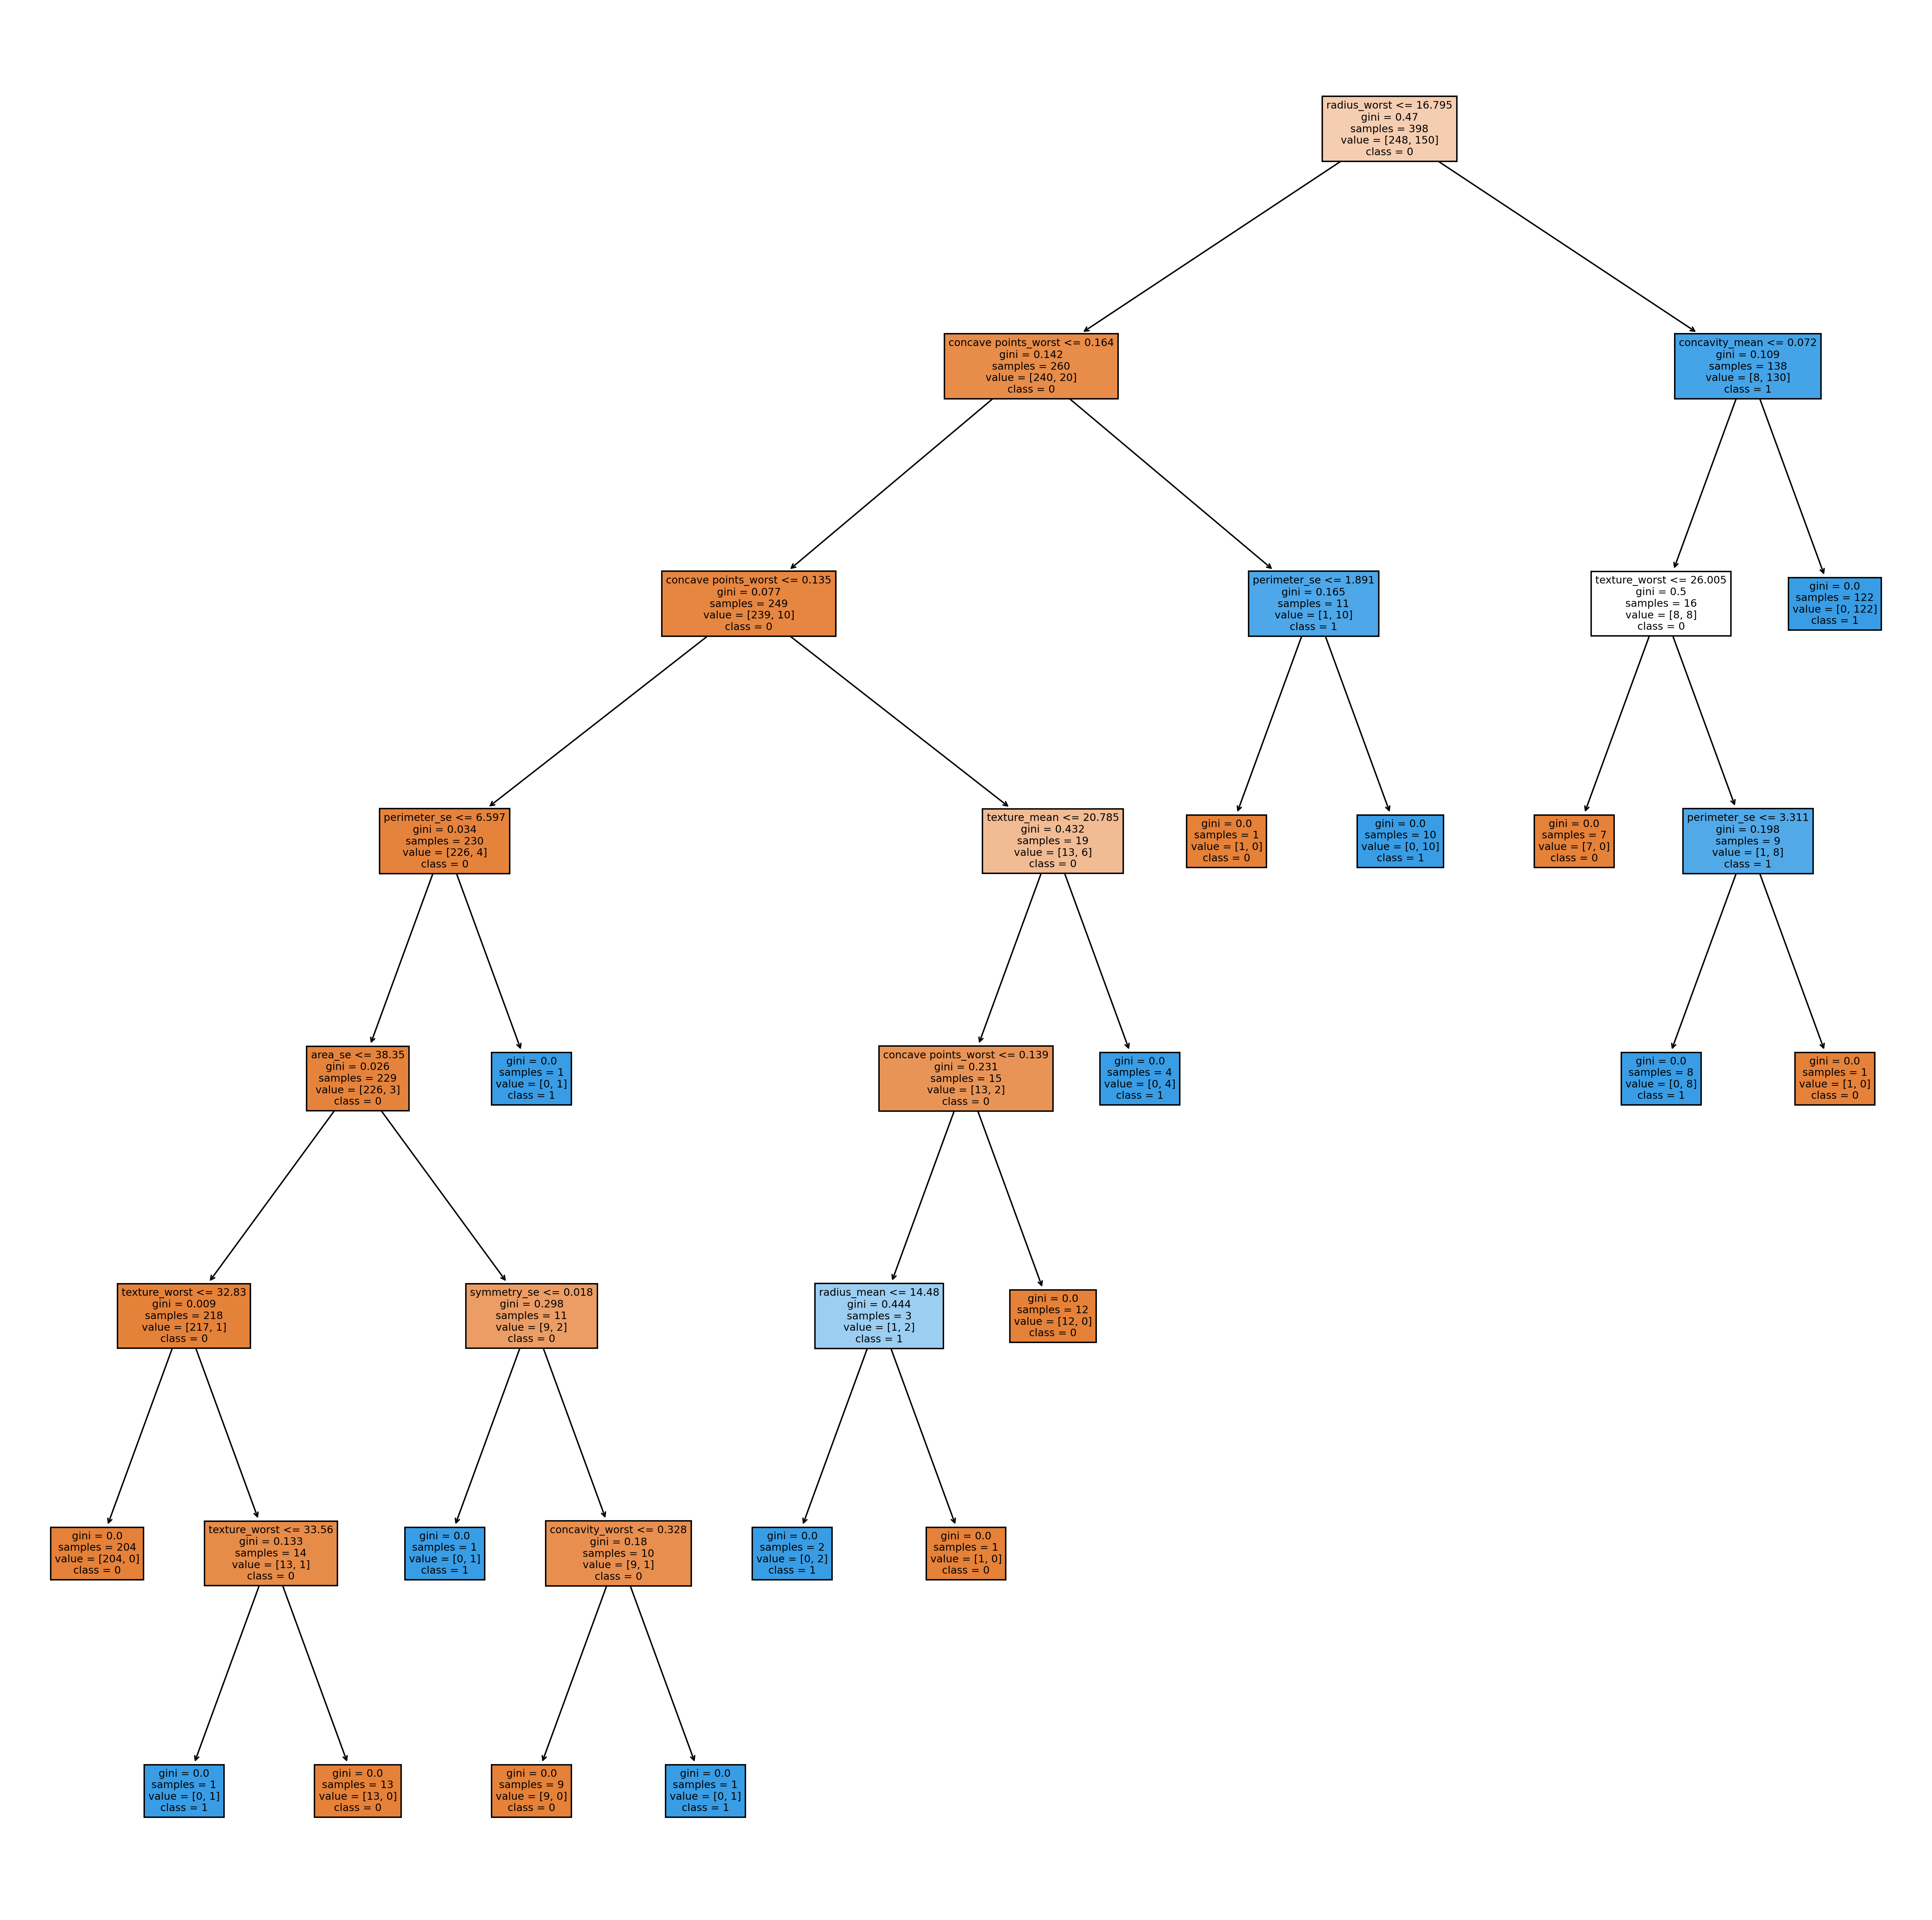

In [65]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (24,24), dpi = 300)

tree.plot_tree(clf_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('../images/plottreefncn.png')

In [66]:
print(clf_model.tree_.max_depth)

7


In [67]:
df[(df['concave points_mean']>0.051) & (df['radius_mean']<=10.76)]

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
152          0        9.731         15.34           63.78      300.2   
376          0       10.570         20.22           70.15      338.3   
504          0        9.268         12.87           61.49      248.7   
505          0        9.676         13.14           64.12      272.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
152          0.10720            0.1599          0.4108              0.07857   
376          0.09073            0.1660          0.2280              0.05941   
504          0.16340            0.2239          0.0973              0.05252   
505          0.12550            0.2204          0.1188              0.07038   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
152         0.2548  ...         11.02          19.49            71.04   
376         0.2188  ...         10.85          22.82            76.51   
504         0.2378  ...         10.28          16.38            69.05   
505         0.2057  ...         10.60          18.04            69.47   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
152       380.5            0.1292             0.2772           0.8216   
376       351.9            0.1143             0.3619           0.6030   
504       300.2            0.1902             0.3441           0.2099   
505       328.1            0.2006             0.3663           0.2913   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
152                0.1571          0.3108                   0.1259  
376                0.1465          0.2597                   0.1200  
504                0.1025          0.3038                   0.1252  
505                0.1075          0.2848                   0.1364  

[4 rows x 31 columns]

In [68]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [69]:
df_feature_imp=pd.DataFrame(clf_model.feature_importances_)

In [70]:
df_feature_imp['col']=X.columns

In [71]:
# decision tree can predict the feature importance which is potentialy useful for feature ranking (EDA)
df_feature_imp.sort_values(by=0,ascending=False)

0                      col
20  0.721852             radius_worst
27  0.113231     concave points_worst
21  0.043935            texture_worst
6   0.037834           concavity_mean
12  0.029612             perimeter_se
1   0.025377             texture_mean
26  0.009629          concavity_worst
18  0.007878              symmetry_se
0   0.007133              radius_mean
13  0.003519                  area_se
22  0.000000          perimeter_worst
17  0.000000        concave points_se
24  0.000000         smoothness_worst
25  0.000000        compactness_worst
19  0.000000     fractal_dimension_se
28  0.000000           symmetry_worst
23  0.000000               area_worst
15  0.000000           compactness_se
16  0.000000             concavity_se
14  0.000000            smoothness_se
11  0.000000               texture_se
10  0.000000                radius_se
9   0.000000   fractal_dimension_mean
8   0.000000            symmetry_mean
7   0.000000      concave points_mean
5   0.000000         compactness_mean
4   0.000000          smoothness_mean
3   0.000000                area_mean
2   0.000000           perimeter_mean
29  0.000000  fractal_dimension_worst

In [74]:
# experimntation can be done using grid search cv and randomized search cv

In [75]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5,7,9, 11, 12],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 9, 11, 12],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [76]:
clf_model = DecisionTreeClassifier()

In [77]:
gs_model = GridSearchCV(estimator=clf_model, 
                        param_grid=parameters,
                       cv=5)

In [78]:
gs_model.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 17],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5]})

In [79]:
gs_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 3}

In [80]:
gs_model.best_score_

0.9573101265822783

randomsearchcv

In [81]:
rs_model = RandomizedSearchCV(estimator=clf_model, 
                        param_distributions=parameters,
                       cv=5)

In [82]:
rs_model.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 17],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': [1, 5, 8, 11],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'random_state': [0, 1, 2, 3, 4, 5]})

In [83]:
rs_model.best_params_

{'random_state': 5,
 'min_samples_split': 5,
 'min_samples_leaf': 11,
 'max_features': 'sqrt',
 'max_depth': 3,
 'criterion': 'gini'}

In [84]:
rs_model.best_score_

0.9347151898734177

note:

1 random forest classifier is averaging multiple decision trees

2 all decision tree hyper parameters are relevant

3 in addition three things to know is n_estimators,booststrapping,max_samples

In [85]:
rf_model =  RandomForestClassifier()

In [86]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [87]:
y_pred = rf_model.predict(X_train)

In [88]:
f1_score(Y_train,y_pred)

1.0

In [89]:
y_pred_test = rf_model.predict(X_test)

In [90]:
f1_score(Y_test,y_pred_test)

0.95

using parameters like  bootstrap,n_estimators max_samples

In [91]:
X_train.shape

(398, 30)

In [92]:
rf_model =  RandomForestClassifier(bootstrap=True,n_estimators=150,max_samples=395)

In [93]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_samples=395, n_estimators=150)

In [94]:
y_pred = rf_model.predict(X_train)

In [95]:
f1_score(Y_train,y_pred)

1.0

In [96]:
y_pred_test = rf_model.predict(X_test)

In [97]:
f1_score(Y_test,y_pred_test)

0.9344262295081968

checking with 2 parameters

In [98]:
parameters = {
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
'random_state' : [0,1,2,3,4,5],
'n_estimators' : [50,100],
'max_samples' :[100,350]
}

In [99]:
gs_model = GridSearchCV(estimator=rf_model, 
                        param_grid=parameters,
                       cv=5)

In [ ]:
gs_model.fit(X_train,Y_train)

In [ ]:
gs_model.best_params_

In [ ]:
gs_model.best_score_

In [3]:
# key points
# if we do pca vif is not required